<a href="https://colab.research.google.com/github/samuelhtampubolon/SDPM2025/blob/main/Tuning_Hyperparameter_dengan_Validation_Curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

#   Memuat Data ---
digits = load_digits()
X, y = digits.data, digits.target

In [2]:
#   Tentukan Hyperparameter dan Rentangnya untuk diuji ---
# Kita akan menguji hyperparameter 'gamma' dari model SVC
param_range = np.logspace(-6, -1, 5)

In [3]:
#   Hitung Skor untuk Training dan Validasi ---
# validation_curve secara otomatis melakukan cross-validation
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=-1)

In [4]:
# Hitung rata-rata dan standar deviasi
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

In [5]:
#   Cetak Hasil Skor ---
print("======= Hasil Validation Curve untuk Hyperparameter 'gamma' =======")
for i, val in enumerate(param_range):
    print(f"Gamma: {val:.6f} | Rata-rata Skor Validasi: {test_scores_mean[i]:.4f}")
print(f"\nNilai 'gamma' terbaik (berdasarkan skor validasi tertinggi): {param_range[np.argmax(test_scores_mean)]:.6f}")
print(f"Skor Validasi Tertinggi: {np.max(test_scores_mean):.4f}")

======= Hasil Validation Curve untuk Hyperparameter 'gamma' =======
Gamma: 0.000001 | Rata-rata Skor Validasi: 0.1575
Gamma: 0.000018 | Rata-rata Skor Validasi: 0.9049
Gamma: 0.000316 | Rata-rata Skor Validasi: 0.9599
Gamma: 0.005623 | Rata-rata Skor Validasi: 0.8693
Gamma: 0.100000 | Rata-rata Skor Validasi: 0.1030

Nilai 'gamma' terbaik (berdasarkan skor validasi tertinggi): 0.000316
Skor Validasi Tertinggi: 0.9599


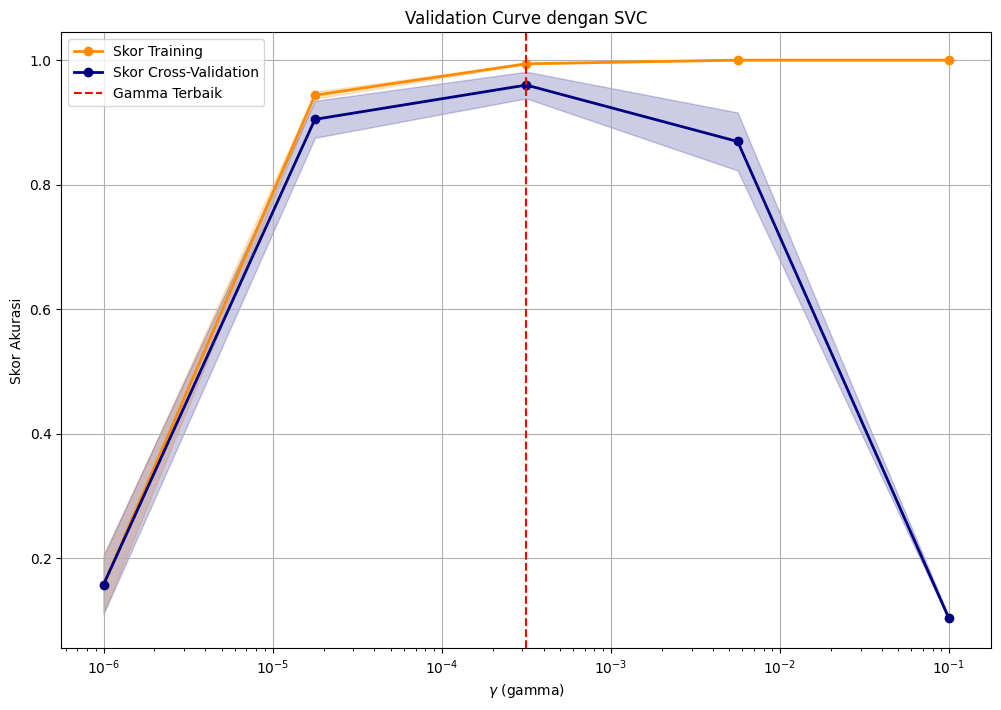

In [6]:
#   Tampilkan 3 Visualisasi (dalam satu plot utama) ---
plt.figure(figsize=(12, 8))

# Plot utama: Validation Curve
plt.title("Validation Curve dengan SVC")
plt.xlabel(r"$\gamma$ (gamma)")
plt.ylabel("Skor Akurasi")
plt.semilogx(param_range, train_scores_mean, label="Skor Training", color="darkorange", lw=2, marker='o')
plt.semilogx(param_range, test_scores_mean, label="Skor Cross-Validation", color="navy", lw=2, marker='o')

# Visual 1 & 2: Area Standar Deviasi (menunjukkan varians)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="darkorange")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="navy")

# Visual 3: Menandai titik optimal
best_gamma_index = np.argmax(test_scores_mean)
plt.axvline(param_range[best_gamma_index], linestyle='--', color='red', label=f'Gamma Terbaik')

plt.legend(loc="best")
plt.grid(True)
plt.show()